# Weather Data Prediction 
I chose this project to predict the weather near Jackson, MI. This is where fsae competion is in the summer.
The weather data came from https://nowdata.rcc-acis.org/grr/. I collected by hand and combined the data from 2018 to 2023. 

In [528]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

weatherIn = pd.read_csv('weatherCSV.csv')
weatherIn['Precip'].replace('T', np.nan, inplace=True)
weatherIn['Precip'] = pd.to_numeric(weatherIn['Precip'], errors='coerce')
mean_precip = weatherIn['Precip'].mean()
weatherIn['Precip'].fillna(mean_precip, inplace=True)
# Create data from only 2018
weatherIn['Date'] = pd.to_datetime(weatherIn['Date'])


print(weatherIn.head())

        Date  MaxTmp  MinTmp  AvgTmp  Depart  HDD  CDD  Precip NewSnow  \
0 2018-05-01      83      55    69.0    15.9    0    4    0.00       0   
1 2018-05-02      84      64    74.0    20.5    0    9    0.03       0   
2 2018-05-03      72      59    65.5    11.7    0    1    0.57       0   
3 2018-05-04      72      55    63.5     9.3    1    0    0.12       0   
4 2018-05-05      80      56    68.0    13.4    0    3    0.00       0   

   SnowDep  
0        0  
1        0  
2        0  
3        0  
4        0  


/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_42630/4066763745.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weatherIn['Precip'].replace('T', np.nan, inplace=True)
/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_42630/4066763745.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

# Looking at Data Distrobutions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


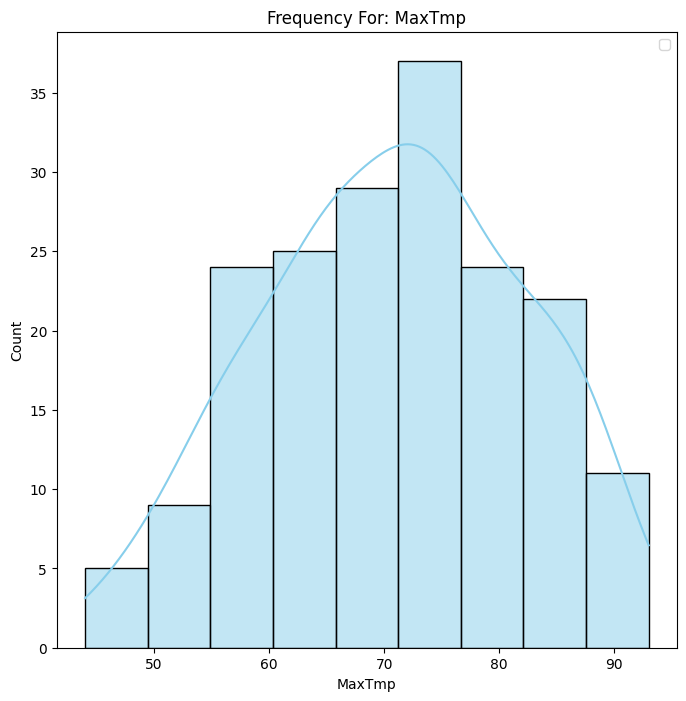

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


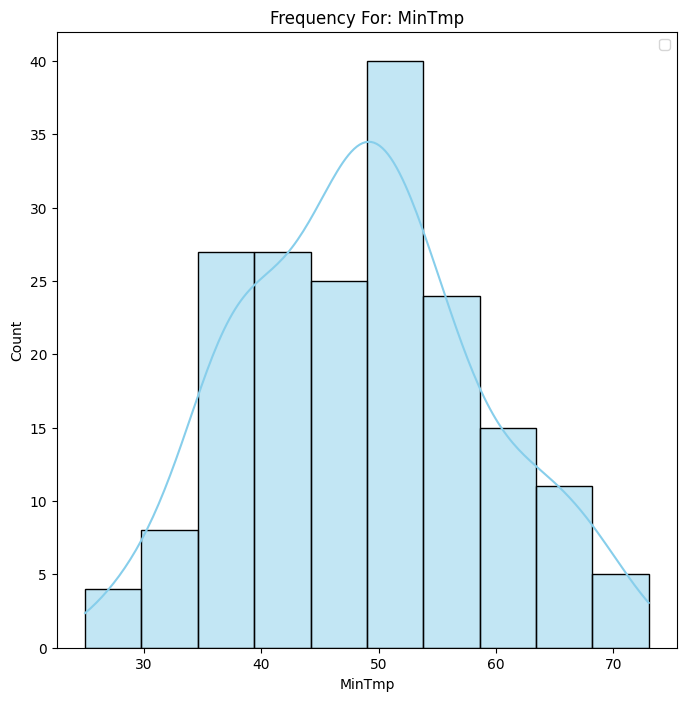

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


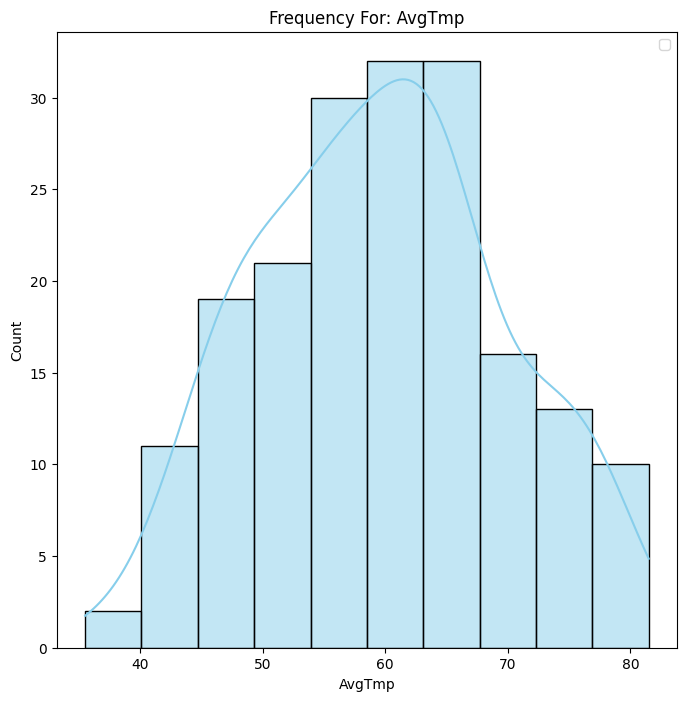

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


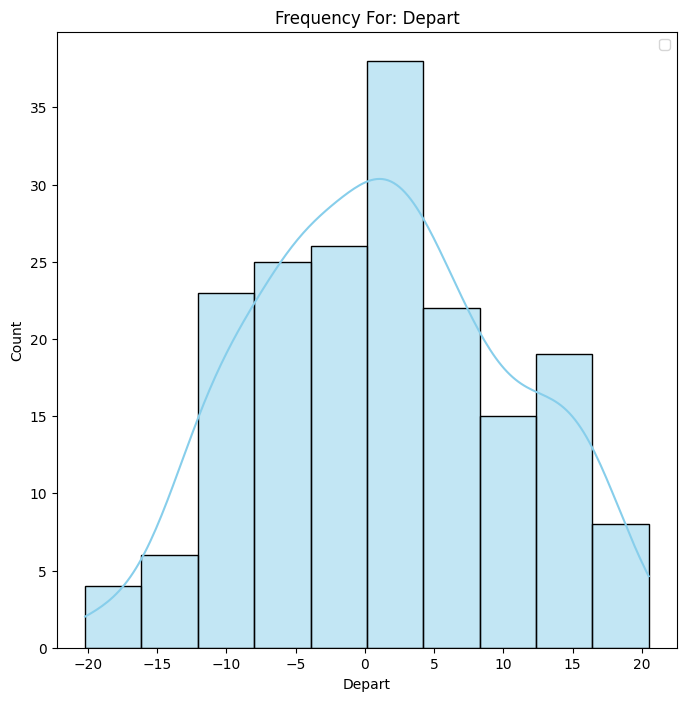

<Figure size 640x480 with 0 Axes>

In [529]:
datCols = ['MaxTmp', 'MinTmp', 'AvgTmp','Depart']

for cols in datCols:
    plt.figure(figsize = (8, 8))
    sns.histplot(weatherIn[cols], kde = True, color = 'skyblue')
    plt.xlabel(cols)
    plt.title("Frequency For: " + cols)
    plt.legend()
    plt.show()

plt.tight_layout()

# for cols in datCols:
#     plt.figure(figsize = (8, 8))
#     if cols == 'Precip':
#         sns.histplot(mayAvg[cols], kde = True, color = 'lightgreen')
#         plt.xticks(rotation = 70)
#     else:
#         sns.histplot(mayAvg[cols], kde = True, color = 'lightgreen')
#     plt.xlabel(cols)
#     plt.title("Frequency For: " + cols)
#     plt.legend()
#     plt.show()

# Model Packages and Training

# --> Experiment 1 Looking at MSE, and R^2

In [530]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = weatherIn[['MaxTmp', 'Depart']]
y = weatherIn['AvgTmp']

In [531]:
# Creating the train and test sets and starting the model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, shuffle = True)
model = LinearRegression()

In [532]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5.685437599619573


# Created a aggregated dataset
The dataset grabs a random day from a random year for all 31 days of may.
I will train the model again with this data and plot as an average prediction.

In [533]:
years = weatherIn['Date'].dt.year.unique()
np.random.seed(42)
selectedDates = set()

for day in range(1, 32):
    year = np.random.choice(years)
    availableDates = weatherIn[(weatherIn['Date'].dt.year == year) & 
                               (weatherIn['Date'].dt.month == 5) & 
                               (weatherIn['Date'].dt.day == day)]['Date'].values
    selectedDate = np.random.choice(availableDates)
    selectedDates.add(selectedDate)

aggregateMay = weatherIn[weatherIn['Date'].isin(selectedDates)]

aggregateMay.reset_index(drop=True, inplace=True)
aggregateMay.reset_index(drop=True, inplace=True)
aggregateMay['Date'] = pd.to_datetime(aggregateMay['Date'])
aggregateMay['DayOfMonth'] = aggregateMay['Date'].dt.strftime('%d-%m')
aggregateMay = aggregateMay.sort_values(by='DayOfMonth')
aggregateMay.drop(columns=['DayOfMonth'], inplace=True)

print(aggregateMay)

         Date  MaxTmp  MinTmp  AvgTmp  Depart  HDD  CDD    Precip NewSnow  \
14 2021-05-01      70      29    49.5    -3.6   15    0  0.000000       0   
20 2022-05-02      53      46    49.5    -4.0   15    0  0.000000       0   
7  2020-05-03      71      45    58.0     4.2    7    0  0.000000       0   
21 2022-05-04      60      44    52.0    -2.2   13    0  0.000000       0   
22 2022-05-05      61      36    48.5    -6.1   16    0  0.000000       0   
3  2019-05-06      72      48    60.0     5.0    5    0  0.040000       0   
8  2020-05-07      62      38    50.0    -5.3   15    0  0.000000       0   
9  2020-05-08      44      27    35.5   -20.2   29    0  0.121598       T   
10 2020-05-09      51      25    38.0   -18.0   27    0  0.000000       0   
23 2022-05-10      84      60    72.0    15.6    0    7  0.000000       0   
15 2021-05-11      56      32    44.0   -12.8   21    0  0.121598       0   
11 2020-05-12      58      30    44.0   -13.1   21    0  0.000000       T   

/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_42630/2676008121.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregateMay['Date'] = pd.to_datetime(aggregateMay['Date'])
/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_42630/2676008121.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregateMay['DayOfMonth'] = aggregateMay['Date'].dt.strftime('%d-%m')


# Predictions with new test dataset

In [534]:
X_pred = aggregateMay[['MaxTmp', 'Depart']]

predicted_avg_temp = model.predict(X_pred)

aggregateMay['Predicted_Avg_Temp'] = predicted_avg_temp

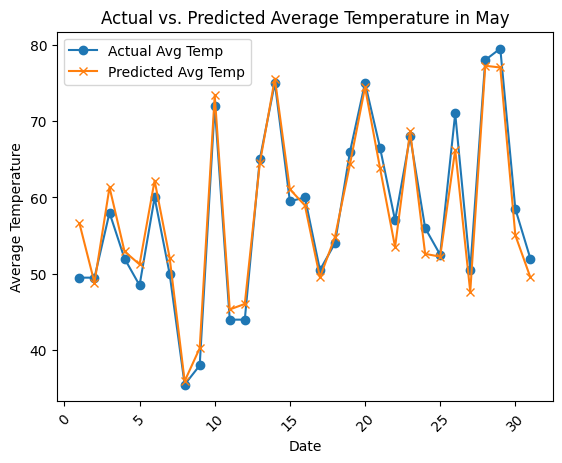

In [535]:
aggregateMay['DayOfMonth'] = aggregateMay['Date'].dt.day
plt.plot(aggregateMay['DayOfMonth'], aggregateMay['AvgTmp'], label='Actual Avg Temp', marker='o')

# Plot predicted average temperature
plt.plot(aggregateMay['DayOfMonth'], aggregateMay['Predicted_Avg_Temp'], label='Predicted Avg Temp', marker='x')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Actual vs. Predicted Average Temperature in May')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show plot
plt.show()

In [539]:
mayDataYear = weatherIn[(weatherIn['Date'].dt.month == 5)].groupby(weatherIn['Date'].dt.year)

# Extract features for prediction
X_pred = aggregateMay[['MaxTmp', 'Depart']]

for year, data in mayDataYear:
    # Extract actual average temperatures for the current year
    actAvgTemp = data.groupby(data['Date'].dt.day)['AvgTmp'].mean().reset_index()
    actAvgTemp.columns = ['Day', 'AvgTmp', 'MaxTmp', 'Depart']
    
    # Fit a linear regression model
    X = actAvgTemp['Day'].values.reshape(-1, 1)
    y = actAvgTemp['AvgTmp'].values
    model2 = LinearRegression()
    model2.fit(X, y)
    
    # Predict temperatures using the linear regression model
    predTemp = model2.predict(X)
    
    # Plot actual average temperatures
    plt.plot(actAvgTemp['Day'], actAvgTemp['AvgTmp'], label=f'Actual {year}', linestyle='-', marker='o', color='skyblue')
    plt.plot(actAvgTemp['Day'], predTemp, label=f'Predicted {year}', linestyle='--', color='red')

    # Predict new temperatures using the linear regression model and X_pred features
    X_pred = actAvgTemp[['MaxTmp', 'Depart']]
    predicted_avg_temp = model.predict(X_pred)
    plt.plot(actAvgTemp['Day'], predicted_avg_temp, label=f'Predicted {year} (New)', linestyle='-', marker='x', color='limegreen')

    plt.xlabel('Day of May')
    plt.ylabel('Temperature')
    plt.title('Actual vs. Predicted Average May Temperature by Year')
    plt.legend()
    plt.grid(True)
    plt.show()

ValueError: Length mismatch: Expected axis has 2 elements, new values have 4 elements

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[73.74244348 76.90942077 66.49019202 65.06340761 70.95928824 56.94077505
 57.46485496 69.25141878 68.50570316 58.62151857 43.00883715 46.47825865
 54.88717372 65.38201352 64.87409531 66.42497589 61.51260827 62.03668819
 61.04797771 51.13666717 52.9847945  53.50367695 65.13325188 67.00850516
 73.22875849 74.8610169  76.62256894 77.76826831 77.6170462  75.05552666
 74.87717861 55.88165098 50.96928336 46.41361184 55.95726203 60.52909525
 62.50708553 48.27790087 48.31022428 63.96619335 48.65075868 43.27895796
 45.01915083 47.69956907 55.08688094 61.17207387 62.45283364 60.2156868
 62.63118169 64.69574726 47.29958532 48.8504659  60.50196931 62.24216218
 52.55248734 67.23014086 60.91811476 60.51813101 55.09784518 55.35180429
 56.4380543  63.52811941 55.55727828 67.07372129 61.59918357 49.20196454
 44.88409043 50.02329121 52.06073083 35.42124875 39.75528457 46.73221776
 39.46900206 45.69445285 48.07762434 53.81708541 63.84729465 58.23769652
 50.13699245 52.74179964 56.80571464 57.70265237 61.

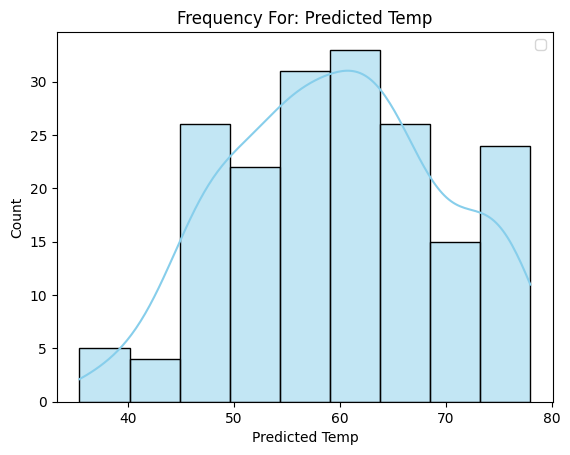

In [537]:
X_train = aggregateMay[['MaxTmp', 'Depart']]
y_train = aggregateMay['AvgTmp']

X_test = weatherIn[['MaxTmp','Depart']]
y_test = weatherIn['AvgTmp']

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred)
print(y_pred.size)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

sns.histplot(y_pred, kde = True, color = 'skyblue')
plt.xlabel('Predicted Temp')
plt.title("Frequency For: Predicted Temp")
plt.legend()
plt.show()
